In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("churn.csv")
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=["RowNumber","CustomerId","Surname","Age"], axis=1, inplace=True)
df.head(3)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
for i in df.columns:
    print("---------------------------------------------------------------------------")
    print(df[i].value_counts())
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: i

In [9]:
df.sample(10)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4424,601,Germany,Female,1,142802.02,1,1,1,57553.02,0
4904,741,France,Female,7,0.00,2,1,1,190534.76,0
7916,562,France,Male,6,0.00,2,1,0,111590.35,0
7807,608,Germany,Male,3,106288.54,1,1,1,36639.25,0
4288,577,Germany,Female,4,61211.18,1,1,1,145250.43,0
1902,773,Spain,Female,10,0.00,1,1,1,98820.09,0
5114,678,France,Male,8,185648.56,1,0,0,192156.54,1
5485,573,Spain,Male,4,0.00,2,1,1,196517.43,0
7134,522,France,Male,5,144147.68,1,1,1,14789.90,0
9195,529,Germany,Male,4,135759.40,1,0,0,112813.79,1


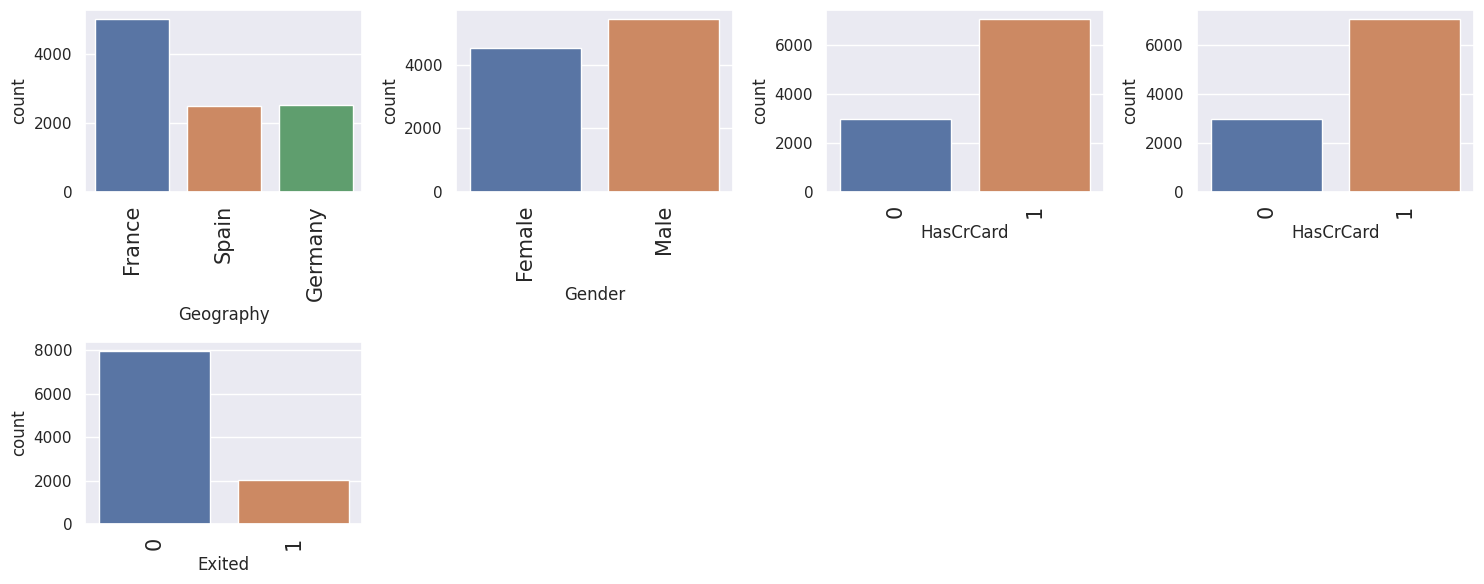

In [10]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['Geography', 'Gender','HasCrCard','HasCrCard','Exited']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [11]:
df.head(2)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0


/tmp/ipykernel_32560/3469258142.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])
/tmp/ipykernel_32560/3469258142.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])
/tmp/ipykernel_32560/3469258142.py:6: UserWarning: 

`distplot` is a depre

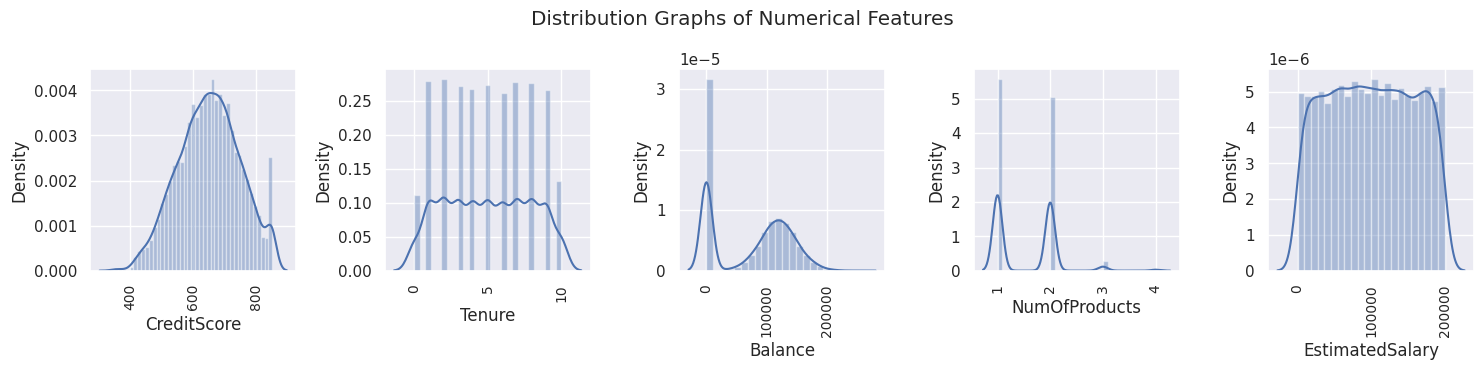

In [12]:
numerical_features = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.suptitle("Distribution Graphs of Numerical Features")
for i in range(len(numerical_features)):
    plt.subplot(2, 5, i+1)
    sns.distplot(df[numerical_features[i]])
    plt.xticks(size=10, rotation=90)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()


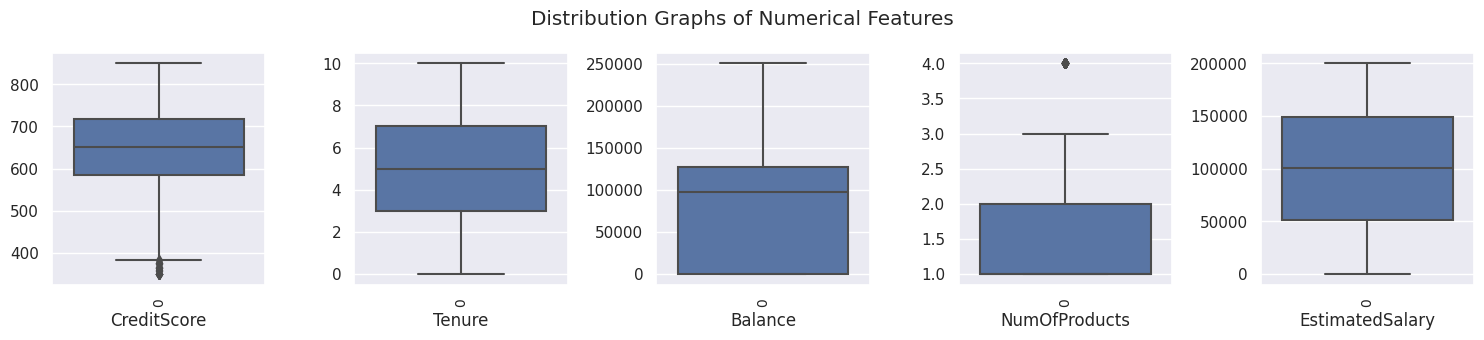

In [13]:
numerical_features = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.suptitle("Distribution Graphs of Numerical Features")
for i in range(len(numerical_features)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[numerical_features[i]])
    plt.xticks(size=10, rotation=90)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()


In [14]:
df.head(3)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
x= df.drop(['Exited'], axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape

(7500, 9)

In [17]:
#encode_cols = ['Geography','Gender']
#x_train = pd.get_dummies(x_train, prefix='', prefix_sep='', dtype=int, drop_first=True)
#x_test = pd.get_dummies(x_test, prefix='', prefix_sep='', dtype=int, drop_first=True)

#x_train.head(4)

In [18]:
encode_cols = ['Geography', 'Gender']
scale_cols=['CreditScore','Balance','EstimatedSalary']


# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse=True), encode_cols),
        ('scalar', StandardScaler(), scale_cols)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and test data
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

x_train

/home/vinod/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 2., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 2., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [19]:
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)
y_hat = dtr.predict(x_test)
print("accuracy : ", {accuracy_score(y_test, y_hat)})
print("mse : ", {mean_squared_error(y_test, y_hat)})

accuracy :  {0.7596}
mse :  {0.2404}


In [20]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("accuracy : ", {accuracy_score(y_test, y_hat)})
print("mse : ", {mean_squared_error(y_test, y_hat)})

accuracy :  {0.7956}
mse :  {0.2044}


In [23]:
from sklearn.model_selection import GridSearchCV
model1 = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2,5,8,10],
    'min_samples_leaf': [1, 2, 4, 6],
    'class_weight': [None, 'balanced']
}

gridsearch = GridSearchCV(model1, param_grid=param_grid, cv=4)

gridsearch.fit(x_train, y_train)

print("Best prams : " , gridsearch.best_params_)
print('Best score : ', gridsearch.best_score_)

Best prams :  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score :  0.8230666666666666


In [40]:
dtr = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=2)
dtr.fit(x_train, y_train)
y_hat = dtr.predict(x_test)
print("accuracy : ", accuracy_score(y_test, y_hat))
print("mse : ", mean_squared_error(y_test, y_hat))

accuracy :  0.8256
mse :  0.1744
